In [67]:
%matplotlib inline
from pylab import *

import os
if not os.path.exists("output/") : os.mkdir("output/")
if not os.path.exists("data/") : os.mkdir("data/")

import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [68]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

x_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
x_test = pd.read_csv('./data/X_test.csv')

In [37]:
print(x_train.shape)
print(x_train.columns)
print(y_train.columns)
print(y_train.shape)
print()

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')
(85751, 1)


In [69]:
# Preprocessing

# Normalizing the data
sc_x = StandardScaler()
x_train_std = sc_x.fit_transform(x_train)
x_test_std = sc_x.fit_transform(x_test)

# Splitting the data into:
#   80% -> training (x_training_std, y_training)
#   20% -> validation (x_validation_std, y_validation)
x_training_std, x_validation_std, y_training, y_validation = train_test_split(x_train_std, y_train, test_size=0.2, random_state=42)

# TODO : Deleting the outlier


All attributes(Original):


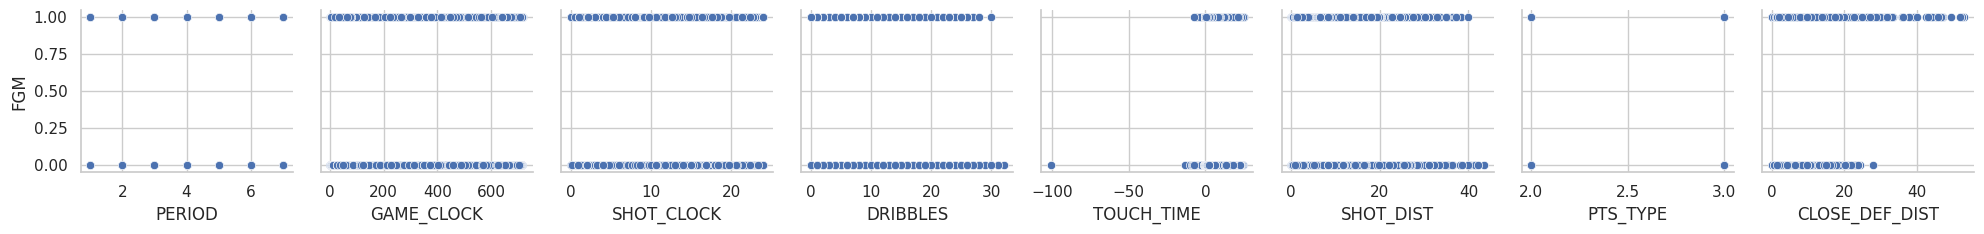

In [70]:
# Plot the pairwise distributions to see the correlation between selected attributes and FMG
# Question : should I compare the attribute of the "Original data" or the "Normalized data" ?
print('All attributes(Original):')
sns.set(style='whitegrid', context='notebook')
sns.pairplot(x_train.assign(FGM=y_train.loc[:,'FGM']), x_vars=x_train.columns, y_vars=y_train.columns, size=2.5)
plt.tight_layout()
plt.show()


In [41]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
value_counts = x_train['TOUCH_TIME'].value_counts()
print(value_counts)

 0.8      8466
 0.9      5993
 1.0      5509
 0.7      4378
 1.1      2748
 0.6      2688
 1.2      2494
 0.0      1955
 1.4      1829
 1.3      1587
 1.6      1511
 2.0      1464
 1.8      1436
 2.2      1392
 1.5      1277
 2.4      1246
 1.9      1159
 1.7      1157
 2.1      1151
 2.6      1105
 2.3      1052
 2.5      1006
 3.0      988 
 2.8      968 
 0.5      892 
 3.2      868 
 2.7      839 
 3.4      817 
 3.6      816 
 2.9      793 
 3.1      746 
 4.0      726 
 3.8      705 
 0.4      692 
 4.2      684 
 3.5      669 
 3.3      642 
 4.6      609 
 0.1      606 
 0.2      593 
 4.8      589 
 3.9      587 
 3.7      580 
 4.4      579 
 4.1      539 
 4.3      532 
 5.2      509 
 4.5      503 
 5.0      495 
 4.7      488 
 0.3      449 
 4.9      440 
 5.6      427 
 5.8      421 
 5.4      409 
 5.1      404 
 5.3      383 
 5.5      353 
 5.7      334 
 6.0      333 
 6.2      304 
 6.1      291 
 5.9      289 
 6.8      277 
 6.4      276 
 6.3      269 
 6.5      

##Part 1##
  Use all features to train any linear model in
scikit-learn and try different hyperparameters (ex. different degree, complexity). Show their performances.

### My thought###
  since the y value is 0 && 1, I think I will view this problem as a binary classifier problem. Therefore, I think I will use two types of linear classifier model, which is `Logistic Regression` and `Ridge Classifier`.


In [71]:
# Ridge Classifier model
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


# Initialize PCA and reduce dimensions
# Choose number of dimensions you want after reduction
dimensions = [0,1,2,3,4,5,6,7,8]
for d in dimensions:
  if d is 0:
    x_training_reduced = x_training_std
    x_valid_reduced = x_validation_std
    print('\nWithout PCA')
  else :
    pca = PCA(n_components=d)
    x_training_reduced = pca.fit_transform(x_training_std)
    x_valid_reduced = pca.transform(x_validation_std)
    print('\n[n_components = %d]' % d)

  alphas = [0, 0.1, 1, 10, 100, 1000, 10000, 50000, 60000, 62500, 75000, 100000]
  for alpha in alphas :
    # Initialize the Ridge Classifier model
    ridge_classifier = RidgeClassifier(alpha=alpha)

    # Fit the model on the training data
    ridge_classifier.fit(x_training_reduced, y_training)

    # Make predictions on the trainging data
    y_train_pred = ridge_classifier.predict(x_training_reduced)
    # Make predictions on the validation data
    y_valid_pred = ridge_classifier.predict(x_valid_reduced)

    # Evaluate the model
    accuracy1 = accuracy_score(y_valid_pred, y_validation)
    accuracy2 = accuracy_score(y_train_pred, y_training)

    print(f"Accuracy with alpha={alpha}:")
    print(f"\t\t training accuracy={accuracy2 * 100:.2f}%")
    print(f"\t\t valid accuracy={accuracy1 * 100:.2f}%")


Without PCA
Accuracy with alpha=0:
		 training accuracy=60.84%
		 valid accuracy=60.25%
Accuracy with alpha=0.1:
		 training accuracy=60.84%
		 valid accuracy=60.25%
Accuracy with alpha=1:
		 training accuracy=60.84%
		 valid accuracy=60.25%
Accuracy with alpha=10:
		 training accuracy=60.85%
		 valid accuracy=60.25%
Accuracy with alpha=100:
		 training accuracy=60.84%
		 valid accuracy=60.29%
Accuracy with alpha=1000:
		 training accuracy=60.86%
		 valid accuracy=60.32%
Accuracy with alpha=10000:
		 training accuracy=60.96%
		 valid accuracy=60.64%
Accuracy with alpha=50000:
		 training accuracy=60.99%
		 valid accuracy=60.85%
Accuracy with alpha=60000:
		 training accuracy=60.95%
		 valid accuracy=60.88%
Accuracy with alpha=62500:
		 training accuracy=60.90%
		 valid accuracy=60.91%
Accuracy with alpha=75000:
		 training accuracy=60.72%
		 valid accuracy=60.64%
Accuracy with alpha=100000:
		 training accuracy=60.34%
		 valid accuracy=60.17%

[n_components = 1]
Accuracy with alpha=0:

In [72]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression


# Initialize PCA and reduce dimensions
# Choose number of dimensions you want after reduction
dimensions = [0,1,2,3,4,5,6,7,8]
for d in dimensions:
  if d is 0:
    x_training_reduced = x_training_std
    x_valid_reduced = x_validation_std
    print('\nWithout PCA')
  else :
    pca = PCA(n_components=d)
    x_training_reduced = pca.fit_transform(x_training_std)
    x_valid_reduced = pca.transform(x_validation_std)
    print('\n[n_components = %d]' % d)

  # Initialize the Logistic Regression model
  logistic_model = LogisticRegression()

  # Fit the model on the training data
  logistic_model.fit(x_training_reduced, y_training)

  # Make predictions on the trainging data
  y_train_pred = logistic_model.predict(x_training_reduced)
  # Make predictions on the validation data
  y_valid_pred = logistic_model.predict(x_valid_reduced)

  # Evaluate the model
  accuracy1 = accuracy_score(y_valid_pred, y_validation)
  accuracy2 = accuracy_score(y_train_pred, y_training)

  print(f"\t\t training accuracy={accuracy2 * 100:.2f}%")
  print(f"\t\t valid accuracy={accuracy1 * 100:.2f}%")


Without PCA
		 training accuracy=60.86%
		 valid accuracy=60.30%

[n_components = 1]
		 training accuracy=53.78%
		 valid accuracy=53.59%

[n_components = 2]
		 training accuracy=58.81%
		 valid accuracy=58.63%

[n_components = 3]
		 training accuracy=58.51%
		 valid accuracy=58.81%

[n_components = 4]
		 training accuracy=58.94%
		 valid accuracy=58.97%

[n_components = 5]
		 training accuracy=59.01%
		 valid accuracy=59.19%

[n_components = 6]
		 training accuracy=59.67%
		 valid accuracy=60.24%

[n_components = 7]
		 training accuracy=60.79%
		 valid accuracy=60.38%

[n_components = 8]
		 training accuracy=60.86%
		 valid accuracy=60.30%


##Part 2##
Select 1 setting (model + hyperparameters) and plot the error curve to show that the setting you selected isn't over-fit.

### My thoughts###
Since the highest acc is the `RidgeClassifier` and `alpha` is about 60000 and without the PCA, I decided to plot it's error curve

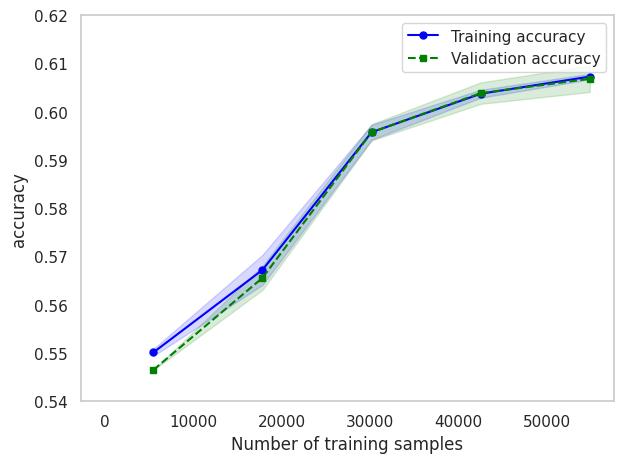

In [73]:
from sklearn.model_selection import learning_curve

sigma = 1

x_training_reduced = x_training_std
x_valid_reduced = x_validation_std

ridge_classifier = RidgeClassifier(alpha=60000)

train_sizes, train_scores, valid_scores = learning_curve(estimator=ridge_classifier, X=x_training_reduced, y=y_training, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training accuracy')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, valid_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')
plt.fill_between(train_sizes,
    valid_mean+valid_std,
    valid_mean-valid_std,
    alpha=0.15, color='green')

plt.hlines(y=sigma, xmin=0, xmax=80, color='red', linewidth=2, linestyle='--')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.ylim([0.54, 0.62])
plt.tight_layout()
plt.show()

From the above accuracy curve can found out that the over-fitting problem did not happend, and can see that the training accuracy and the validation accuracy is really close (The reason I choose to use the accuracy instead of the MSE or BSE is because accuracy is more readable for me)

##Part 3##
Use any method to choose the best 3 features that can best aid the model's prediction. Explain how you find it.

###My thoughts###
I'll use the seaborn library and pyplot to draw out the distributoin to observe the relationship between the attribute and the FGM

In [74]:
tmp = x_train.assign(FGM=y_train.loc[:,'FGM'])

In [75]:
tmp.columns

Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE',
       'CLOSE_DEF_DIST', 'FGM'],
      dtype='object')

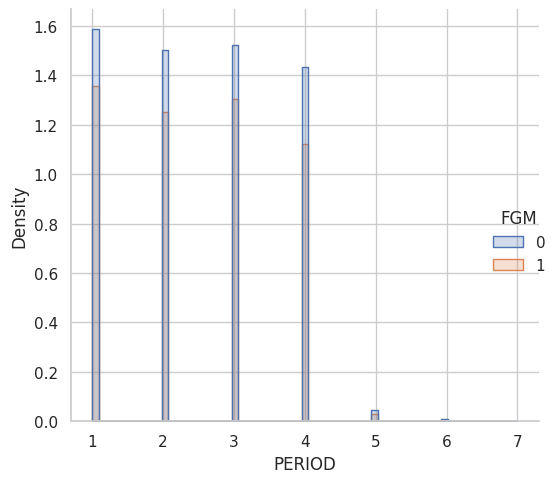

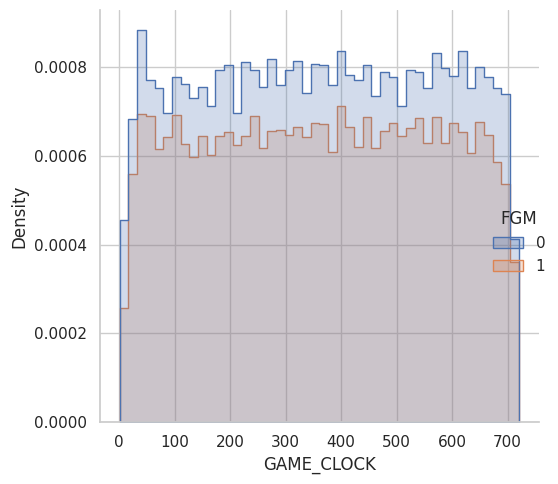

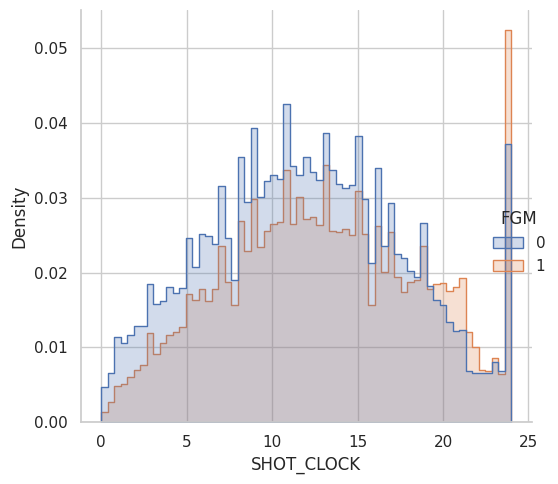

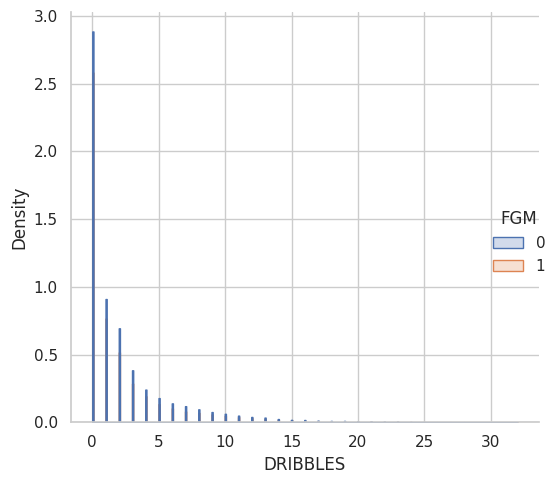

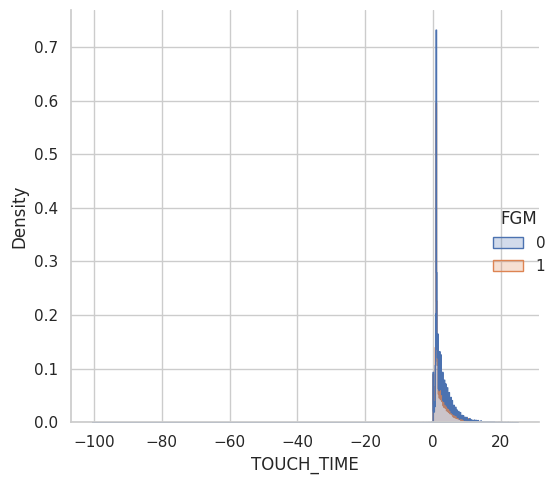

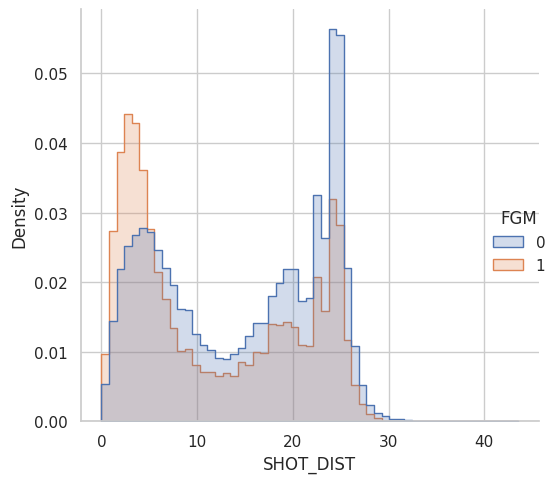

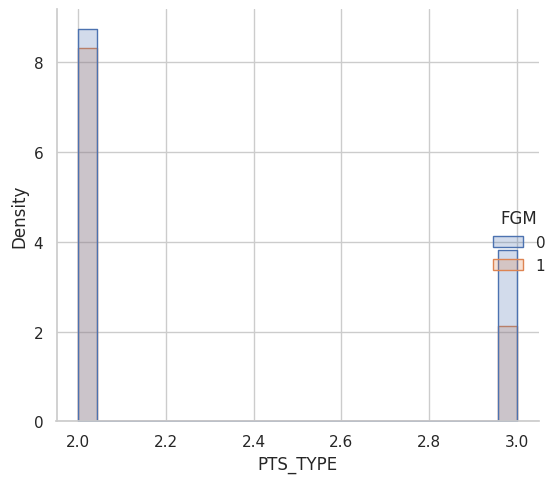

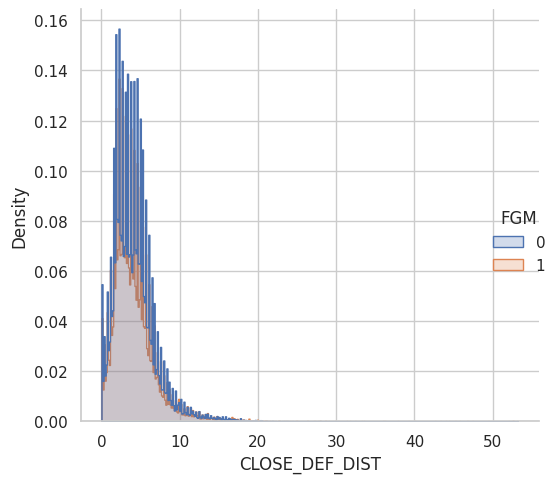

In [76]:
sns.set(style='whitegrid', context='notebook')
for index in x_train.columns:
  sns.displot(tmp, x=index, hue='FGM', element='step', stat='density')
  plt.tight_layout()
  plt.show()

After printing out the distribution graph, it seems that the `SHOT_CLOCK` `SHOT_DIST` `CLOSE_DEF_DIST` are more diverge, and are more possible to be cut into two by linear classifier, so I'll choose these three attribute

##Part 4##
Train the model selected in 2. with the only 3 features selected in 3., and present the training error.
###My thoughts###
I'll choose the `SHOT_CLOCK`, `SHOT_DIST`, `CLOSE_DEF_DIST` and do the same ridge classification to classify the `FGM`

In [77]:
indexs=['SHOT_CLOCK', 'SHOT_DIST', 'CLOSE_DEF_DIST']
x_train_select = x_train[indexs]
x_test_select = x_test[indexs]
# print(x_select.columns)
# print(x_select.shape)

# Normalizing the data
sc_x = StandardScaler()
x_train_std = sc_x.fit_transform(x_train_select)
x_test_std = sc_x.fit_transform(x_test_select)

# Splitting the data into:
#   80% -> training (x_training_std, y_training)
#   20% -> validation (x_validation_std, y_validation)
x_training_std, x_validation_std, y_training, y_validation = train_test_split(x_train_std, y_train, test_size=0.2, random_state=42)


In [78]:
alphas = [0, 0.1, 1, 10, 100, 1000, 10000, 50000, 60000, 62500, 75000, 100000]
for alpha in alphas :
  # Initialize the Ridge Classifier model
  ridge_classifier = RidgeClassifier(alpha=alpha)

  # Fit the model on the training data
  ridge_classifier.fit(x_training_std, y_training)

  # Make predictions on the trainging data
  y_train_pred = ridge_classifier.predict(x_training_std)
  # Make predictions on the validation data
  y_valid_pred = ridge_classifier.predict(x_validation_std)

  # Evaluate the model
  accuracy1 = accuracy_score(y_valid_pred, y_validation)
  accuracy2 = accuracy_score(y_train_pred, y_training)

  print(f"Accuracy with alpha={alpha}:")
  print(f"\t\t training accuracy={accuracy2 * 100:.2f}%")
  print(f"\t\t valid accuracy={accuracy1 * 100:.2f}%")

Accuracy with alpha=0:
		 training accuracy=60.64%
		 valid accuracy=60.46%
Accuracy with alpha=0.1:
		 training accuracy=60.64%
		 valid accuracy=60.46%
Accuracy with alpha=1:
		 training accuracy=60.64%
		 valid accuracy=60.46%
Accuracy with alpha=10:
		 training accuracy=60.64%
		 valid accuracy=60.46%
Accuracy with alpha=100:
		 training accuracy=60.64%
		 valid accuracy=60.45%
Accuracy with alpha=1000:
		 training accuracy=60.68%
		 valid accuracy=60.51%
Accuracy with alpha=10000:
		 training accuracy=60.80%
		 valid accuracy=60.81%
Accuracy with alpha=50000:
		 training accuracy=60.75%
		 valid accuracy=60.53%
Accuracy with alpha=60000:
		 training accuracy=60.55%
		 valid accuracy=60.32%
Accuracy with alpha=62500:
		 training accuracy=60.50%
		 valid accuracy=60.25%
Accuracy with alpha=75000:
		 training accuracy=60.26%
		 valid accuracy=59.97%
Accuracy with alpha=100000:
		 training accuracy=59.48%
		 valid accuracy=59.15%


In [79]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(x_training_std, y_training)

# Make predictions on the trainging data
y_train_pred = logistic_model.predict(x_training_std)
# Make predictions on the validation data
y_valid_pred = logistic_model.predict(x_validation_std)

# Evaluate the model
accuracy1 = accuracy_score(y_valid_pred, y_validation)
accuracy2 = accuracy_score(y_train_pred, y_training)

print(f"\t\t training accuracy={accuracy2 * 100:.2f}%")
print(f"\t\t valid accuracy={accuracy1 * 100:.2f}%")

		 training accuracy=60.60%
		 valid accuracy=60.39%


It seems that the whole performance dropped, and the best setup is ridge classification and `alpha = 10000`

Below is the accuracy curve of ridge classification with alpha=10000

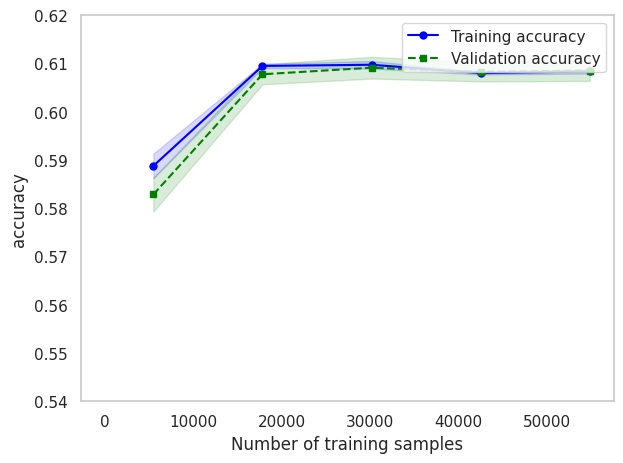

In [80]:
sigma = 1

x_training_reduced = x_training_std
x_valid_reduced = x_validation_std

ridge_classifier = RidgeClassifier(alpha=10000)

train_sizes, train_scores, valid_scores = learning_curve(estimator=ridge_classifier, X=x_training_reduced, y=y_training, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean,
    color='blue', marker='o',
    markersize=5,
    label='Training accuracy')
plt.fill_between(train_sizes,
    train_mean+train_std,
    train_mean-train_std,
    alpha=0.15, color='blue')

plt.plot(train_sizes, valid_mean,
    color='green', linestyle='--',
    marker='s', markersize=5,
    label='Validation accuracy')
plt.fill_between(train_sizes,
    valid_mean+valid_std,
    valid_mean-valid_std,
    alpha=0.15, color='green')

plt.hlines(y=sigma, xmin=0, xmax=80, color='red', linewidth=2, linestyle='--')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.ylim([0.54, 0.62])
plt.tight_layout()
plt.show()

We can see that the data did not have the over-fitting problem, but the performance actually drops. maybe it is because my selection is bad.

##Part 5##
Export the predictions of the model trained in 4. for X_test (follow the format of y_train.csv).

In [82]:
ridge_classifier = RidgeClassifier(alpha=10000)
ridge_classifier.fit(x_training_std, y_training)

y_pred = ridge_classifier.predict(x_test_std)
my_pred = pd.DataFrame({'FGM': y_pred})
my_pred.to_csv('Lab05_112062524_y_pred.csv', index=False)

##Part 6##
A brief report of what you have done in this assignment.
###My thoughts###
1. for part 1, I had tried the ridge regression and logistic regression, I also use the PCA and changing the alpha value to try to improve the performance, however it did not workout.
2. for part 2, I choose to plot out the accuracy graph to see if the model is over-fitting. And it seems that it is not over-fitting.
3. for part 3, I plot out the distribution of each attribute and choose the  `SHOT_CLOCK`, `SHOT_DIST`, `CLOSE_DEF_DIST` to train my next model since these three attributes have the most diverge data.
4. I train the new Ridge classification and logistic model, and after plotting out the accuracy curve, it seems that the performance is not that well, but after I discuss with my classmate, it seems that this is a common situation, so I export the prediction anyway